
## Circuit Preparation and Execution

1. **Circuit Loading**: The code loads a quantum circuit from a QASM file.

2. **BlueQubit Initialization**: It initializes the BlueQubit environment for quantum computation.

3. **Circuit Execution**: The loaded circuit is executed on BlueQubit's GPU device with 1024 shots.

## Result Analysis

1. **Measurement Counts**: The code retrieves and prints the measurement counts from the execution results.

2. **Most Probable State**: It identifies and prints the most probable quantum state and its probability.

3. **Majority Vote Analysis**: The code performs a bit-wise majority vote across all measurement outcomes to determine a hidden bitstring.

4. **Threshold Filtering**: It filters measurement results based on a probability threshold (5% of total shots) to identify high-frequency bitstrings.

## Circuit Modification and Visualization

1. **Circuit Enhancement**: The code adds Hadamard gates to all qubits at the beginning and end of the circuit, and includes measurement operations.

2. **Circuit Visualization**: It displays the modified circuit using Qiskit's drawing functionality.

## Final Analysis and Visualization

1. **Histogram Plot**: The code creates a histogram of measurement outcomes for visual analysis.

2. **Hidden Bitstring Identification**: It determines the most frequent bitstring from the measurement results, identifying it as the hidden bitstring embedded in the circuit.

The code concludes by printing the identified hidden bitstring: "111101001101110101000110100100".

This process combines quantum circuit simulation, statistical analysis of measurement outcomes, and circuit modification techniques to extract and identify a hidden bitstring embedded within the quantum circuit.

In [3]:
from qiskit import QuantumCircuit

In [4]:
qc_circuit = QuantumCircuit.from_qasm_file('/Users/shreyupadhyay/Downloads/circuit_1_30q_fixed.qasm')

In [ ]:
qc_circuit.draw('mpl')

In [ ]:
import bluequbit

bq = bluequbit.init("ylZ4iNr1hywy8SZ0jPeqLku3p3UerJp3")

In [13]:

result = bq.run(qc_circuit, device='gpu', shots=1024)
print(result.get_counts())

BQ-PYTHON-SDK - WARNING - Beta version 0.8.3b1 of BlueQubit Python SDK is being used.
BQ-PYTHON-SDK - INFO - Submitted: Job ID: lreqSWXvLuhb3GPi, device: gpu, run status: RUNNING, created on: 2024-10-25 00:27:53 UTC, estimated runtime: 4836 ms, estimated cost: $0.20, num qubits: 30


{'000000000000100111001011100011': 1, '000000000101110100001001110001': 1, '000000001000010101000110100000': 1, '000000001001010000010000101111': 1, '000000001101110100101001100110': 1, '000000001101110101000101111010': 1, '000000001101110101000110100010': 1, '000000001101110101000110100100': 1, '000000001101110111100101011000': 1, '000000101111110101000111110111': 1, '000000110101101001111101100110': 1, '000000111000000101000110110000': 1, '000000111010010101101000100101': 1, '000000111101110111111010000100': 1, '000001001101110101000110100100': 1, '000001001101110101010110010011': 1, '000001101010111000010111100100': 1, '000010010111110101000110100100': 1, '000010110001000101000100101100': 1, '000010110100111101000110101011': 1, '000011000010001101000110010101': 1, '000011001101110101000001110010': 1, '000011001101110110001101010111': 1, '000011111011110100011100001000': 1, '000011111101110110111010100100': 1, '000100000011111111000110100100': 1, '000100000101100100010100010011': 1, 

In [14]:
counts = result.get_counts()
most_probable_state = max(counts, key=counts.get)
print(f"Most probable state: {most_probable_state} with probability: {counts[most_probable_state]} ")

Most probable state: 111101001101110101000110100100 with probability: 131 


In [22]:
from collections import Counter

# Initialize an empty string to store the final hidden bitstring
bit_length = len(next(iter(counts)))  
hidden_bitstring = ""

# Perform bit-wise majority vote over all measurement outcomes
for i in range(bit_length):
    # Get the i-th bit from all measured bitstrings
    bits_at_position = [bitstring[i] for bitstring in counts.keys() for _ in range(counts[bitstring])]
    # Find the most common bit at this position
    most_common_bit = Counter(bits_at_position).most_common(1)[0][0]
    hidden_bitstring += most_common_bit

print(f"Hidden Bitstring (Majority Vote): {hidden_bitstring}")


Hidden Bitstring (Majority Vote): 111101001101110101000110100100


In [23]:
# Set a probability threshold (here 5%)
threshold = 0.05 * sum(counts.values())

# Filter bitstrings with occurrences above the threshold
filtered_counts = {k: v for k, v in counts.items() if v >= threshold}

print("Filtered Bitstrings with High Frequency:")
print(filtered_counts)


Filtered Bitstrings with High Frequency:
{'111101001101110101000110100100': 131}


Figure(2228.98x24029.8)


BQ-PYTHON-SDK - INFO - Submitted: Job ID: wqq4mItBvh4b7t7K, device: gpu, run status: RUNNING, created on: 2024-10-25 00:59:47 UTC, estimated runtime: 4836 ms, estimated cost: $0.20, num qubits: 30


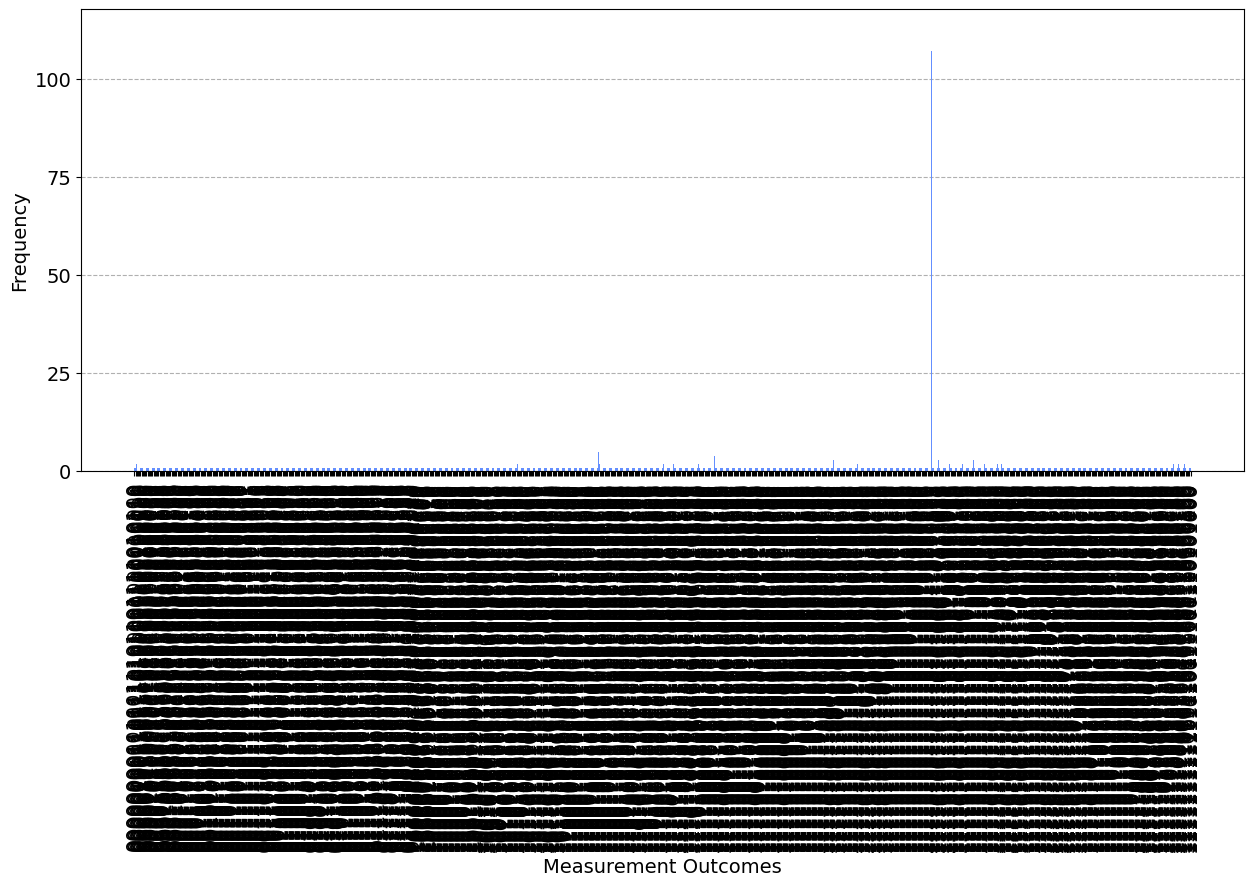

Hidden Bitstring: 111101001101110101000110100100


In [26]:

qasm_file_path = "/Users/shreyupadhyay/Downloads/circuit_1_30q_fixed.qasm"  
circuit = QuantumCircuit.from_qasm_file(qasm_file_path)

#Plot the histogram of the measurement outcomes
fig, ax = plt.subplots(figsize=(15, 6))
plot_histogram(counts, ax=ax, bar_labels=False)
plt.xticks(rotation=90)
plt.xlabel("Measurement Outcomes", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

# Find the most frequent bitstring (hidden bitstring)
hidden_bitstring = max(counts, key=counts.get)
print(f"Hidden Bitstring: {hidden_bitstring}")


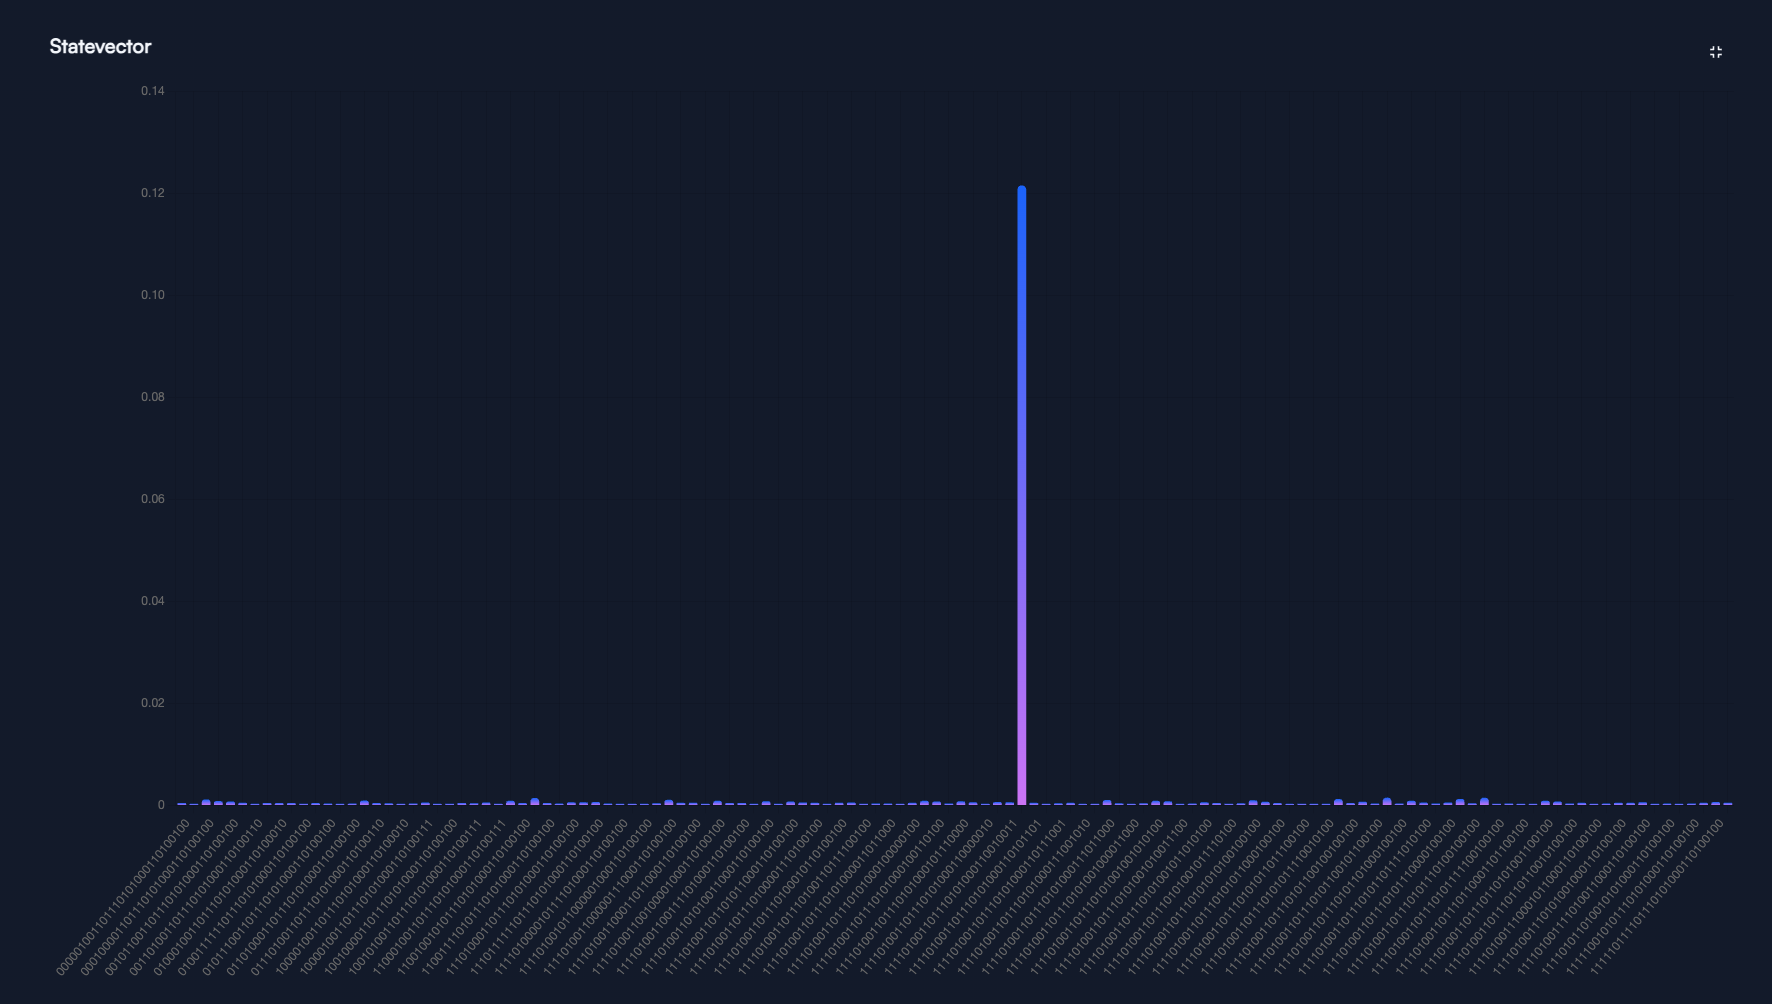